# Calculating Energy Eigenvalues for Many Particle System

## Current Goals

Immediate Goals:
- Implement Sparse Matrices from Scipy
- Check values up to 4 particles
Other Goals:
- Add latex in the markup sections

## Program Structure & Functions

Re-write this section

## Imports and Dependencies


In [30]:
import numpy as np
import seaborn as sns
import scipy as scp
import pandas as pd
import matplotlib.pyplot as plt

## Global Constants

In [10]:
spin_x = np.array(([0+0j,1+0j],[1+0j,0+0j]))
spin_y = np.array(([0+0j,0-1j],[0+1j,0+0j]))
spin_z = np.array(([1+0j,0+0j],[0+0j,-1+0j]))

print(spin_x, "\n")
print(spin_y, "\n")
print(spin_z, "\n")

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]] 

[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]] 

[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]] 



# Inner Product Function

- Accepts
    - Spin Index I | Not used yet
    - Spin Index J | Not used yet 
    - Axis | must be single char, x, y, z
    - Number of particles in lattice n

In [11]:
def matrix_expansion(matrix_a, matrix_b):
    quadrant_1 = matrix_a[0][0] * matrix_b
    quadrant_2 = matrix_a[0][1] * matrix_b
    quadrant_3 = matrix_a[1][0] * matrix_b
    quadrant_4 = matrix_a[1][1] * matrix_b
    
    top_half = np.concatenate((quadrant_1, quadrant_2), axis=1)
    bottom_half = np.concatenate((quadrant_3, quadrant_4), axis=1)
    return np.concatenate((top_half, bottom_half))
    
def elem_from_index(index, i, j, spin):
    if(index == i or index == j):
        return spin
    else:
        return np.identity(2)

def axis_inner_product(spin_axis, i, j, particles: int):
    
    partial_product = elem_from_index(particles-1, i, j, spin_axis)
    
    for x in range(particles-2, -1, -1):
        new_elem = elem_from_index(x, i, j, spin_axis)
        partial_product = matrix_expansion(new_elem, partial_product)

    return partial_product


In [12]:
#np.set_printoptions(precision=0, suppress=True)

print(np.real(axis_inner_product(spin_x,1,2,3)))
print(np.real(axis_inner_product(spin_y,1,2,3)))
print(np.real(axis_inner_product(spin_z,1,2,3)))



[[0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]
[[ 0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  0. -0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [-0.  0.  0.  0. -1.  0.  0.  0.]]
[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0. -0.  0. -0.  0. -0.]
 [ 0.  0. -1. -0.  0.  0. -0. -0.]
 [ 0. -0. -0.  1.  0. -0. -0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0. -0.  0. -0.  0. -1.  0. -0.]
 [ 0.  0. -0. -0.  0.  0. -1. -0.]
 [ 0. -0. -0.  0.  0. -0. -0.  1.]]


# Summing the Hamiltonian


In [19]:
def hamiltonian_sum(lattice_size, cyclic):
    matrix_size = 2**lattice_size
    matrix_sum = np.zeros((matrix_size, matrix_size))
    for x in range(lattice_size - 1):
        i = x
        j = x + 1
        matrix_sum = np.add(matrix_sum, axis_inner_product(spin_x, i,j,lattice_size))
        matrix_sum = np.add(matrix_sum, axis_inner_product(spin_y, i,j,lattice_size))
        matrix_sum = np.add(matrix_sum, axis_inner_product(spin_z, i,j,lattice_size))
    return matrix_sum
        
        

[[ 3.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  2.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  2.+0.j -1.+0.j  0.+0.j  2.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j  2.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  2.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  2.+0.j
   0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  2.+0.j  0.+0.j -3.+0.j  2.+0.j  0.+0.j  0.+0.j
   2.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  2.+0.j -1.+0.j  0.+0.j  0.+0.j
   0.+0.j  2.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.

<AxesSubplot: >

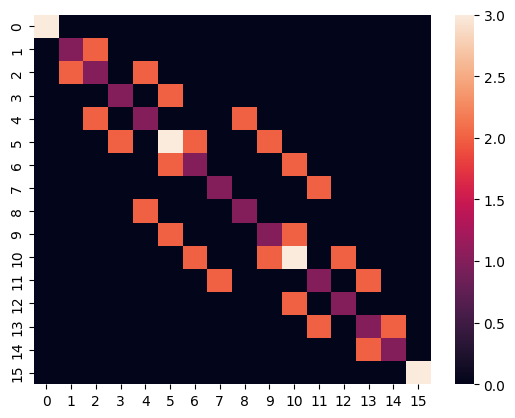

In [20]:
m = hamiltonian_sum(4,False)
print(m)
sns.heatmap(np.abs(m))


# write routine to check for hermitian (transpose and complex conjugate )
# numpy similarity function


NameError: name 'Z' is not defined

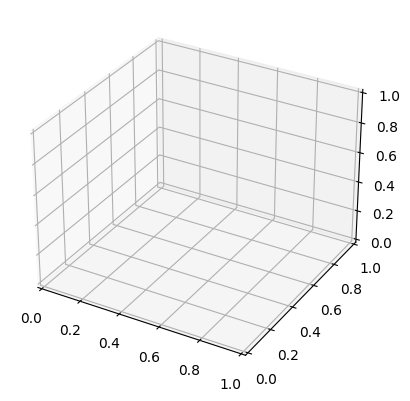

In [21]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

S = 3
X = np.arange(0, S, 1)
Y = np.arange(0, S, 1)
X, Y = np.meshgrid(X, Y)

R = m[X][Y]
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=1, antialiased=True)

fig.colorbar(surf, shrink=0.2, aspect=5)

print(m)

In [22]:
np.linalg.eig(m)



(array([-3.82842712+0.j, -1.        +0.j,  3.        +0.j,  1.82842712+0.j,
        -3.82842712+0.j, -1.        +0.j,  3.        +0.j,  1.82842712+0.j,
        -6.46410162+0.j, -3.82842712+0.j,  3.        +0.j, -1.        +0.j,
         1.82842712+0.j,  0.46410162+0.j,  3.        +0.j,  3.        +0.j]),
 array([[ 0.00000000e+00+0.j, -0.00000000e+00-0.j,  0.00000000e+00+0.j,
         -0.00000000e+00-0.j,  0.00000000e+00+0.j, -0.00000000e+00-0.j,
         -0.00000000e+00-0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         -0.00000000e+00-0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         -0.00000000e+00-0.j,  0.00000000e+00+0.j,  1.00000000e+00+0.j,
          0.00000000e+00+0.j],
        [ 0.00000000e+00+0.j, -0.00000000e+00-0.j,  0.00000000e+00+0.j,
         -0.00000000e+00-0.j, -2.70598050e-01+0.j,  5.00000000e-01+0.j,
          5.00000000e-01+0.j, -6.53281482e-01+0.j,  1.15117768e-16+0.j,
         -2.41031462e-02-0.j, -1.16495802e-02+0.j, -3.29346817e-01+0.j,
         -1.688

In [33]:
import scipy.sparse.linalg as lin

sparse_hamiltonian = scp.sparse.csr_matrix(m)
scp.sparse.linalg.eigs(sparse_hamiltonian)

(array([-6.46410162-8.09663849e-17j, -3.82842712-1.11022302e-16j,
        -3.82842712-2.77555756e-17j, -3.82842712+9.22861639e-18j,
         3.        -5.55111512e-17j,  3.        -3.47329756e-17j]),
 array([[-5.90393776e-17-8.71859583e-20j,  1.90473124e-17+3.85044925e-18j,
         -2.31760063e-17-1.42434398e-17j, -7.68610431e-17+8.32448516e-17j,
          1.15337495e-01-1.39856855e-01j, -1.38938626e-02-1.72198785e-01j],
        [ 3.85084596e-17+7.43025931e-17j,  5.52078316e-02+1.44417619e-02j,
         -6.30671962e-02-7.78469929e-02j,  2.16141557e-01-1.14362141e-01j,
         -1.94571132e-01+1.57731791e-01j, -1.54853928e-01+1.88141063e-01j],
        [ 6.25323628e-17+1.18577136e-16j, -1.33283496e-01-3.48654974e-02j,
          1.52257680e-01+1.87939266e-01j, -5.21811877e-01+2.76094632e-01j,
         -1.94571132e-01+1.57731791e-01j, -1.54853928e-01+1.88141063e-01j],
        [ 2.91731052e-02+1.46553844e-01j, -1.64842075e-01-1.81844466e-01j,
          6.10699887e-02+4.90838441e-02j,  8.29